<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/fasle3class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The IMDB dataset

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data.shape

(25000,)

In [ ]:
list0=train_data[0]
list1=train_data[1]
lable0=train_labels[0]
#for i in range(len(list0)):
  #print(list0[i])

In [ ]:
#for sequence in train_data:
#  print(max(sequence))
max([max(sequence)for sequence in train_data])  

9999

In [ ]:
word_index = imdb.get_word_index()

In [6]:
word_index.items()

جای عدد و کلمه را برعکس کردیم تا بتوان از روی عدد کلمه را پیدا کرد

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [ ]:
reverse_word_index.get(1,'?')

'the'

ما 10000 تا کلمه در متن داریم اگر در آن ده هزارتا جای خالی بود به جای آن یک و در غیر اینصورت به جای آن صفر میگذاریم

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

تست راه کار عجیب بالا::

In [ ]:
results = np.zeros((1, 20))
results[0,[1,6,2,3,7,10]]=1.
for i in range(15):
  print(results[0][i])

0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


In [ ]:
a=["Mohammad","Ali","Hasan","Hossein"]
for i,j in enumerate(a):
    print(i,j)

0 Mohammad
1 Ali
2 Hasan
3 Hossein


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

یا میتوان تابع اپتیمایزر را اینگونه صدا کرد

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


و همچنین توابه لاس فانکشن و اکیوریسی

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 113ms/step - loss: 0.0528 - accuracy: 0.9866 - val_loss: 0.4007 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 2s 74ms/step - loss: 0.0473 - accuracy: 0.9882 - val_loss: 0.4057 - val_accuracy: 0.8784
Epoch 3/20
30/30 [==============================] - 3s 94ms/step - loss: 0.0405 - accuracy: 0.9914 - val_loss: 0.4552 - val_accuracy: 0.8645
Epoch 4/20
30/30 [==============================] - 3s 104ms/step - loss: 0.0346 - accuracy: 0.9925 - val_loss: 0.4590 - val_accuracy: 0.8700
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0281 - accuracy: 0.9950 - val_loss: 0.4791 - val_accuracy: 0.8732
Epoch 6/20
30/30 [==============================] - 2s 75ms/step - loss: 0.0223 - accuracy: 0.9969 - val_loss: 0.5030 - val_accuracy: 0.8701
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0221 - accuracy: 0.9963 - val_loss: 0.5248 - val_accuracy: 0.8718
Epoch 8/20


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

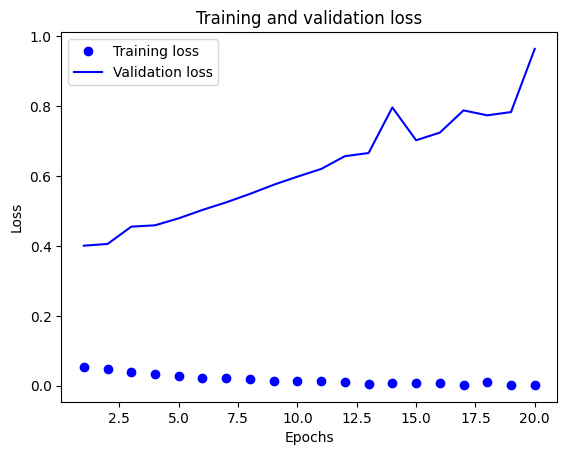

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

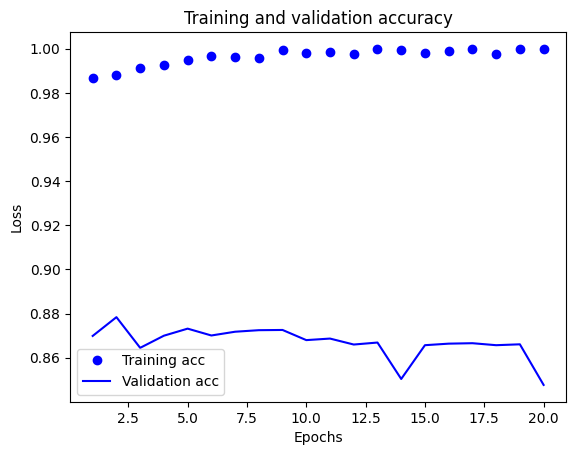

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


دیدیم که مدل اور فیت شده است پس بیایید آن را از اول اموزش دهیم با کل داده ها و ارزیابی کنیم با داده های تست

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=512)

Epoch 1/20
49/49 [==============================] - 5s 81ms/step - loss: 0.4772 - accuracy: 0.8107
Epoch 2/20
49/49 [==============================] - 3s 62ms/step - loss: 0.2809 - accuracy: 0.9035
Epoch 3/20
49/49 [==============================] - 4s 74ms/step - loss: 0.2203 - accuracy: 0.9206
Epoch 4/20
49/49 [==============================] - 5s 103ms/step - loss: 0.1849 - accuracy: 0.9329
Epoch 5/20
49/49 [==============================] - 4s 87ms/step - loss: 0.1625 - accuracy: 0.9422
Epoch 6/20
49/49 [==============================] - 3s 62ms/step - loss: 0.1441 - accuracy: 0.9501
Epoch 7/20
49/49 [==============================] - 2s 49ms/step - loss: 0.1292 - accuracy: 0.9554
Epoch 8/20
49/49 [==============================] - 6s 116ms/step - loss: 0.1158 - accuracy: 0.9610
Epoch 9/20
49/49 [==============================] - 2s 50ms/step - loss: 0.1014 - accuracy: 0.9668
Epoch 10/20
49/49 [==============================] - 5s 113ms/step - loss: 0.0955 - accuracy: 0.9686
Epoch 

# The same model is defined using the functional API:

In [ ]:
input_tensor = layers.Input(shape=(10000,))
x = layers.Dense(16, activation='relu')(input_tensor)
x = layers.Dense(16, activation='relu')(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 6s 112ms/step - loss: 0.4492 - accuracy: 0.8181
Epoch 2/5
49/49 [==============================] - 3s 62ms/step - loss: 0.2651 - accuracy: 0.9062
Epoch 3/5
49/49 [==============================] - 5s 95ms/step - loss: 0.2106 - accuracy: 0.9252
Epoch 4/5
49/49 [==============================] - 2s 49ms/step - loss: 0.1761 - accuracy: 0.9384
Epoch 5/5
49/49 [==============================] - 4s 74ms/step - loss: 0.1561 - accuracy: 0.9436


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.6892 - accuracy: 0.8546


In [ ]:
y_test_pridict=model.predict(x_test)

782/782 [==============================] - 5s 6ms/step


In [ ]:
y_test_pridict=y_test_pridict.reshape((25000,))
y_test_pridict=np.round(y_test_pridict)

print(y_test_pridict[:20])
print(y_test[:20])

[0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


# Classifying newswires:
a multiclass classification example
# :طبقه بندی اخبار
یک مثال طبقه بندی چند کلاسه

There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


مثلا کد سه مربوط به اخبار اقتصادی بازار سهام است

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])

In [7]:
train_labels[2]

3

Encoding the data

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding

روش اول برای وان هات کردن

In [14]:
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
  results[i, label] = 1.
 return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


روش دوم برای وان هات کردن

In [15]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Building your network

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
#model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compiling the model

In [17]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


Validating your approach

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

 Training the model

In [19]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 6s 40ms/step - loss: 2.7114 - accuracy: 0.5006 - val_loss: 1.8547 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.5541 - accuracy: 0.6763 - val_loss: 1.3808 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1825 - accuracy: 0.7417 - val_loss: 1.1797 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9569 - accuracy: 0.7958 - val_loss: 1.0730 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7933 - accuracy: 0.8321 - val_loss: 1.0178 - val_accuracy: 0.7690
Epoch 6/20
16/16 [==============================] - 1s 72ms/step - loss: 0.6633 - accuracy: 0.8638 - val_loss: 0.9502 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5534 - accuracy: 0.8842 - val_loss: 0.9014 - val_accuracy: 0.8140
Epoch 8/20
16

Plotting the training and validation loss

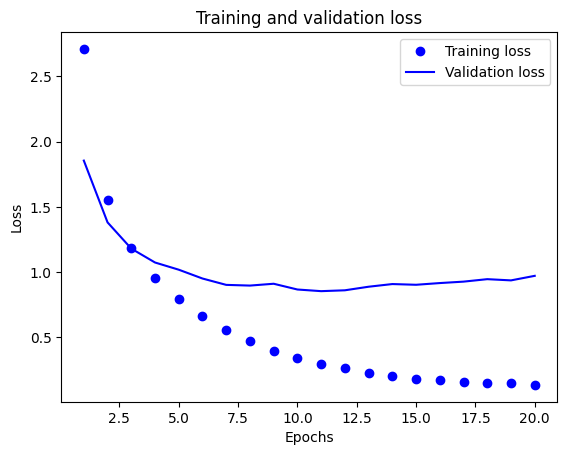

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

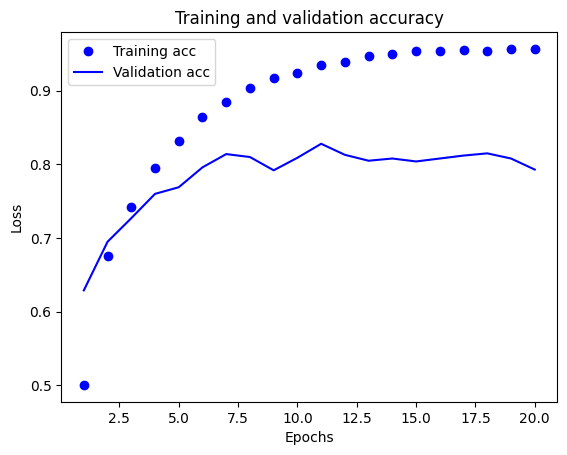

In [21]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Retraining a model from scratch

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 47ms/step - loss: 2.8011 - accuracy: 0.4397 - val_loss: 1.9003 - val_accuracy: 0.6260
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.5824 - accuracy: 0.6784 - val_loss: 1.4105 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1996 - accuracy: 0.7504 - val_loss: 1.2003 - val_accuracy: 0.7350
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.9615 - accuracy: 0.7968 - val_loss: 1.0751 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.7892 - accuracy: 0.8307 - val_loss: 1.0011 - val_accuracy: 0.7830
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6590 - accuracy: 0.8608 - val_loss: 0.9399 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 33ms/step - loss: 0.5504 - accuracy: 0.8882 - val_loss: 0.9131 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

این روش به دقت 80% می رسد. با طبقه بندی باینری متعادل
مشکل، دقت به دست آمده توسط یک طبقه بندی کاملا تصادفی 50٪ خواهد بود. ولی در
این مورد نزدیک به 19٪ است، بنابراین نتایج بسیار خوب به نظر می رسد، حداقل در مقایسه با
یک پایه تصادفی:

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:

In [24]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

Generating predictions on new data

In [26]:
predictions = model.predict(x_test)
print(predictions.shape)

71/71 [==============================] - 0s 6ms/step
(2246, 46)


In [27]:
print(np.sum(predictions[0]))

1.0000001


In [33]:
print(predictions[0])

[7.0819992e-04 2.6286746e-04 4.9228111e-05 6.2293881e-01 3.4788549e-01
 2.2157437e-04 5.6916720e-05 3.2719952e-05 8.3303228e-03 3.6592473e-04
 1.0034005e-04 4.8605751e-04 1.4962403e-04 3.1640206e-03 1.2762385e-04
 4.5565175e-05 2.5355786e-03 2.5979654e-04 8.3811661e-05 2.3858421e-03
 2.8589698e-03 5.3756707e-04 2.9567207e-05 7.9126284e-04 6.2294173e-05
 9.7450007e-05 2.0122781e-05 2.7992160e-04 6.7256210e-06 8.2509924e-04
 2.2054660e-04 1.2802808e-04 1.1607092e-04 2.4699257e-05 1.6751855e-04
 1.5707697e-05 1.8391508e-03 8.0777565e-05 7.4171726e-06 1.3143405e-03
 1.4475019e-04 3.1922486e-05 2.9161545e-05 3.7122456e-05 4.9731429e-06
 1.3852486e-04]


In [30]:
print(np.argmax(predictions[0]))

3


همیت داشتن لایه های میانی به اندازه کافی بزرگ

A model with an information bottleneck

The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 32ms/step - loss: 2.8925 - accuracy: 0.3354 - val_loss: 2.1128 - val_accuracy: 0.5940
Epoch 2/20
63/63 [==============================] - 1s 20ms/step - loss: 1.8030 - accuracy: 0.6102 - val_loss: 1.5654 - val_accuracy: 0.6380
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.4045 - accuracy: 0.6805 - val_loss: 1.4005 - val_accuracy: 0.6650
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2193 - accuracy: 0.7185 - val_loss: 1.3190 - val_accuracy: 0.6810
Epoch 5/20
63/63 [==============================] - 2s 30ms/step - loss: 1.1003 - accuracy: 0.7412 - val_loss: 1.2784 - val_accuracy: 0.7060
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0104 - accuracy: 0.7566 - val_loss: 1.2563 - val_accuracy: 0.7060
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9396 - accuracy: 0.7667 - val_loss: 1.2678 - val_accuracy: 0.7160
Epoch 8/20
63/63

 Predicting house prices: a regression example

شما سعی خواهید کرد میانگین قیمت خانه‌ها را در حومه بوستون پیش‌بینی کنید
اواسط دهه 1970، با توجه به اطلاعات مربوط به حومه در آن زمان، مانند میزان جرم و جنایت،
نرخ مالیات بر دارایی محلی، و غیره. مجموعه داده ای که استفاده می کنید تفاوت جالبی دارد
از دو مثال قبلی نقاط داده نسبتا کمی دارد: فقط 506، تقسیم
بین 404 نمونه آموزشی و 102 نمونه آزمایشی. و هر ویژگی در داده های ورودی
(مثلاً میزان جرم و جنایت) مقیاس متفاوتی دارد. به عنوان مثال، برخی از مقادیر نسبت هایی هستند که مقادیری بین 0 و 1 دارند. برخی دیگر مقادیر بین 1 تا 12، برخی دیگر بین 0 تا 100 و غیره می گیرند.

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


هر داده ورودی سیزده تا فیچر دارد 

In [3]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


مثلا خانه اول با مشخصات بالا حدودا 15 هزار دلار قیمت گذاری شده است

In [4]:
print(train_targets[0])

15.2


# Preparing the data

Normalizing the data

توجه داشته باشید که مقادیر استفاده شده برای نرمال سازی داده های تست با استفاده از عدد داده های آموزشی محاسبه می شوند
 

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Building your network

از آنجایی که نمونه های کمی در دسترس است، از یک شبکه بسیار کوچک با دو لایه مخفی استفاده خواهید کرد
هر کدام با 64 واحد. به طور کلی، هرچه داده های آموزشی کمتری داشته باشید، اضافه برازش بدتر خواهد بود و استفاده از یک شبکه کوچک یکی از راه های کاهش اضافه برازش است.

شبکه با یک واحد و بدون فعال سازی به پایان می رسد (این یک لایه خطی خواهد بود). این هست
یک تنظیم معمولی برای رگرسیون اسکالر (رگرسیونی که در آن شما سعی می کنید یک واحد را پیش بینی کنید
مقدار پیوسته). اعمال یک تابع فعال سازی محدوده ای را که خروجی می تواند بگیرد محدود می کند. به عنوان مثال، اگر یک تابع فعال سازی سیگموئید را در آخرین لایه اعمال کنید،
شبکه فقط می تواند یاد بگیرد که مقادیر بین 0 و 1 را پیش بینی کند. در اینجا، زیرا آخرین
لایه کاملاً خطی است، شبکه آزاد است تا پیش بینی مقادیر را در هر محدوده ای بیاموزد

In [ ]:
from keras import models
from keras import layers
def build_model():
 model = models.Sequential()
 model.add(layers.Dense(64, activation='relu',
 input_shape=(train_data.shape[1],)))
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(1))
 model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
 return model